### Grabbing Gear

In [1]:
import warnings
warnings.filterwarnings("ignore")

# The norms
import pandas as pd
import numpy as np

# Viz libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm # scatter matrix
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

import telco_acquire
import telco_prepare

# Algorithms libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
df = telco_acquire.get_telco_data()
df.head(5)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [3]:
df.describe()

# Just raw df shape with the applied table changes

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
payment_type_id             7043 non-null int64
internet_service_type_id    7043 non-null int64
contract_type_id            7043 non-null int64
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
paperless_billing           7043 non-null object
monthly_charges 

In [5]:
df = telco_prepare.phone_lines(df)
df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,phone_and_multi_line
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,2
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),1
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check,1


In [6]:
df = telco_prepare.partner_dependents(df)
df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,phone_and_multi_line,partner_and_dependents
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,2,0
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),1,2
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check,1,0


In [7]:
df.streaming_tv.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64

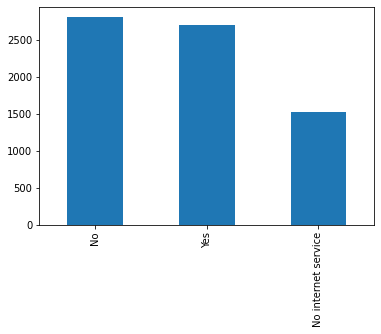

In [8]:
df.streaming_tv.value_counts().plot(kind= "bar")

In [9]:
df.streaming_movies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64

In [10]:
df.tenure.value_counts().unique()

array([613, 362, 238, 200, 176, 170, 133, 131, 123, 119, 117, 116, 110,
       109, 100,  99,  98,  97,  95,  94,  90,  89,  88,  87,  85,  80,
        79,  76,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,
        63,  61,  60,  59,  57,  56,  51,  50,  11])

In [11]:
df.contract_type.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

In [12]:
df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [13]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,phone_and_multi_line,partner_and_dependents
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,2,0
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),1,2
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check,1,0
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check,0,0
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic),0,3


In [14]:
df.senior_citizen.value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [15]:
df.device_protection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

In [16]:
df.tech_support.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

In [17]:
df.paperless_billing.value_counts()

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

In [18]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [19]:
df.online_security.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

In [20]:
df.online_backup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

In [21]:
df.payment_type.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

In [22]:
df.partner_and_dependents.value_counts()

0    3280
3    1749
1    1653
2     361
Name: partner_and_dependents, dtype: int64

In [23]:
df.phone_and_multi_line.value_counts()

1    3390
2    2971
0     682
Name: phone_and_multi_line, dtype: int64

In [24]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

#### Whate these value counts are saying (simple math to get percentages - sample / total = %) 

- Data is split nearly perfectly in half between male & female (50.5% M, 49.5% F)
- Only 16% of the customers are senior citizens
- 71% don't use online security
- 66% of customers do NOT have online backup (at least, not through this company)
- 34% have device protection
- 29% have / use tech support
- 62% of the customers are NOT streaming tv
- 61% are NOT streaming movies
- 59% use paperless billing
- 55% of customers are on a month-to-month plan, 24% are on 2-yr, 21% on 1-yr contracts
- 44% have Fiberoptic internet service, 34% DSL, and 22% don't even have it
- 43% are on autopay (22% from account, 21% credit card), 34% pay by electronic check, and 23% still mail in their payments
- 48% have phone lines, 42% have multiple phone lines, and 10% have neither (cellphone?)
- 47% of customers are single, 25% are married w/ kids, 23% are partnered w/o kids, and 5% are single parents

#### Re-iterating STL Concern:

**Why are we losing 27% of our customers to churn, and keeping only 73%?**

In [25]:
# Checking some possible relationships with crosstabs for categoricals

pd.crosstab(df.gender, df.churn)

churn,No,Yes
gender,,
Female,2549,939
Male,2625,930



**There's no marked relationship between gender and churn - women churn at 27%, men at 26%**

In [26]:
pd.crosstab(df.senior_citizen, df.churn)

churn,No,Yes
senior_citizen,,
0,4508,1393
1,666,476


**42% of Senior Citizens churn.  No bueno.  Clearly something to look at**



In [27]:
pd.crosstab(df.online_security, df.churn)

churn,No,Yes
online_security,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


**Only 15% of those with online_security churn; 85% of them stay.  Worth considering how to improve this features' membership**

In [28]:
pd.crosstab(df.online_backup, df.churn)

churn,No,Yes
online_backup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


**Only 7% of those with online backup churn.  Push this more.**

In [29]:
pd.crosstab(df.device_protection, df.churn)

churn,No,Yes
device_protection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


**Interesting: same numbers as online_backup.  Is 'online_backup' just another way of saying 'device_protection?'  Let's check:**

In [30]:
pd.crosstab(df.online_backup, df. device_protection)

device_protection,No,No internet service,Yes
online_backup,,,
No,1984,0,1104
No internet service,0,1526,0
Yes,1111,0,1318


**The answer is 'No,' as the numbers are similar, but not exact.**

In [31]:
pd.crosstab(df.tech_support, df.churn)

churn,No,Yes
tech_support,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


**15% of those who utilize tech support churn.  Improve customer service  in IT, and market this more.**

In [32]:
pd.crosstab(df.streaming_tv, df.churn)

churn,No,Yes
streaming_tv,,
No,1868,942
No internet service,1413,113
Yes,1893,814


**30% of those streaming TV leave.  Doesn't seem this is any kind of anchor to their staying with us.**

In [33]:
pd.crosstab(df.streaming_movies, df.churn)

churn,No,Yes
streaming_movies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


**Similar numbers to streaming_tv with similar result = not an anchor; don't need to drop one of these columns**

In [34]:
pd.crosstab(df.paperless_billing, df.churn)

churn,No,Yes
paperless_billing,,
No,2403,469
Yes,2771,1400


**Surprisingly, 34% of those with paperless billing still churn.  How we actually bill them is not a strong indicator of their loyalty to us.**

In [35]:
pd.crosstab(df.contract_type, df.churn)

churn,No,Yes
contract_type,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


**43% of those on Monthly contracts churn, while 11% of people on 1-year contracts and 3% of with 2-yr contract churn.  Get rid of the the month_to_month and incentivize conversions over to one- and two-year contract terms.**  

In [36]:
pd.crosstab(df.internet_service_type, df.churn)

churn,No,Yes
internet_service_type,,
DSL,1962,459
Fiber optic,1799,1297
None,1413,113


**42% of those with Fiberoptic churn, while only 19% of those with DSL dropped.  Internet_service_type, though, seems - objectively, at least - like it's not a real determinant of loyalty.  ie: these are offerings many other telecom companies provide.**

In [37]:
pd.crosstab(df.payment_type, df.churn)

churn,No,Yes
payment_type,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


**Automatic payments are the way to go.  Only 16% of those with automatic payments churn.  Understandably, Credit Card payments have a higher retention rate over bank transfers.**

In [38]:
pd.crosstab(df.phone_and_multi_line, df.churn)

churn,No,Yes
phone_and_multi_line,,
0,512,170
1,2541,849
2,2121,850


**25% of people without land_lines churn, those with 1 phone line churn at 25% and those with more than one phone line churn at a rate of 29%.** 

In [39]:
pd.crosstab(df.partner_and_dependents, df.churn)

churn,No,Yes
partner_and_dependents,,
0,2157,1123
1,1233,420
2,284,77
3,1500,249


**Loyalty amongst Single people is unpredictable, churning at about 34%.  Married people without kids churn at about 25%, single parents at 21%, and Married people with kids at 14%.**

### Splitting the data between Train, Test, and Validate

In [40]:
X_train, y_train, X_validate, y_validate, X_test, y_test = telco_prepare.split_telco(df)

In [46]:
# Checking to see if make sure all rows are split between train, validate, and test.

# the '[0]' at the end of the function print tells it to only print the row #.

print(f"Number of trained rows: {X_train.shape[0]}")
print(f"Number of validated rows: {X_validate.shape[0]}")
print(f"Number of test rows: {X_test.shape[0]}")

Number of trained rows: 4500
Number of validated rows: 1125
Number of test rows: 1407


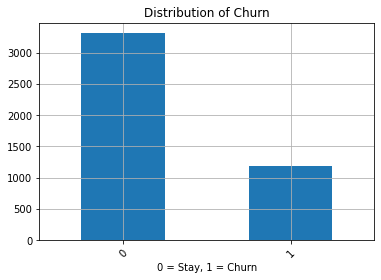

In [72]:
# Quick visualization of churn percentages, 0=stay, 1=churn

X_train.churn.value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Churn")
plt.xlabel("0 = Stay, 1 = Churn")
plt.xticks(rotation=45)
plt.grid(b = True, which = "major")

In [64]:
X_train.corr()

,gender,senior_citizen,tenure,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,...,Electronic check,Mailed check,Credit card (automatic),Bank transfer (automatic),DSL,Fiber optic,None,Month-to-month,One year,Two year
gender,1.000000,0.000596,0.004998,-0.008942,-0.013848,0.006885,-0.029079,-0.011879,-0.003863,-0.019508,...,-0.008996,-0.013346,0.005474,0.015892,-0.006819,0.000981,0.006698,-0.001055,0.009000,-0.007339
senior_citizen,0.000596,1.000000,0.009529,-0.117105,-0.018954,-0.028216,-0.174685,0.024232,0.046669,0.162936,...,-0.008456,-0.031439,0.175443,-0.159482,-0.120502,0.264619,-0.180429,0.142662,-0.039390,-0.127920
tenure,0.004998,0.009529,1.000000,0.334211,0.377728,0.366118,0.326478,0.301078,0.294345,0.006180,...,0.235399,0.237472,-0.211010,-0.228126,0.013991,0.015885,-0.035369,-0.649775,0.200276,0.562775
online_security,-0.008942,-0.117105,0.334211,1.000000,0.184183,0.174590,0.283704,0.050905,0.061645,-0.149088,...,0.096398,0.128060,-0.250901,0.062591,0.145750,-0.245519,0.128162,-0.373038,0.125085,0.313477
online_backup,-0.013848,-0.018954,0.377728,0.184183,1.000000,0.181171,0.210481,0.150048,0.142180,-0.007073,...,0.103595,0.082017,-0.132835,-0.032748,0.005600,-0.051920,0.056262,-0.288375,0.121787,0.218462
device_protection,0.006885,-0.028216,0.366118,0.174590,0.181171,1.000000,0.243138,0.279399,0.288624,-0.039807,...,0.085856,0.141213,-0.147406,-0.057455,-0.007778,-0.040670,0.058133,-0.349486,0.133546,0.278123
tech_support,-0.029079,-0.174685,0.326478,0.283704,0.210481,0.243138,1.000000,0.177468,0.166049,-0.114647,...,0.098504,0.117702,-0.256431,0.077063,0.132788,-0.233830,0.129022,-0.409870,0.117087,0.363785
streaming_tv,-0.011879,0.024232,0.301078,0.050905,0.150048,0.279399,0.177468,1.000000,0.454041,0.083329,...,0.051622,0.046566,0.026664,-0.127291,-0.172903,0.159563,0.007092,-0.236530,0.089883,0.188707
streaming_movies,-0.003863,0.046669,0.294345,0.061645,0.142180,0.288624,0.166049,0.454041,1.000000,0.077004,...,0.046217,0.058148,0.014291,-0.119418,-0.163066,0.150586,0.006566,-0.229564,0.095498,0.175289
paperless_billing,-0.019508,0.162936,0.006180,-0.149088,-0.007073,-0.039807,-0.114647,0.083329,0.077004,1.000000,...,-0.007928,-0.023942,0.201361,-0.196835,-0.064024,0.319619,-0.312180,0.169372,-0.065443,-0.134099


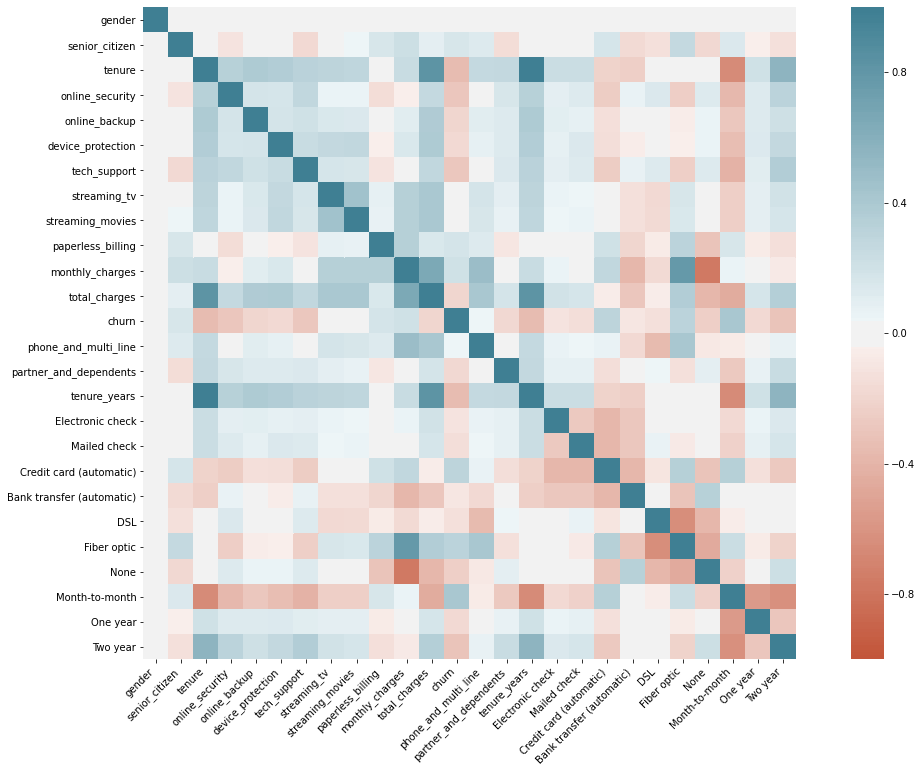

In [73]:
related = X_train.corr()

plt.figure(figsize=(20,12))

ax = sns.heatmap(
    related,
    #cannot annotate, too crowded
    vmin=-1, vmax=1, center=0, # set for r-value range -1, 0, 1
    cmap=sns.diverging_palette(20, 220, n=200), # set blue for colorblindness consideration
    square=True
)
# setting labels to be readable
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Scattering to check continuous variables against each other

In [78]:
cmap = cm.get_map("gnuplot")

axes = pd.plotting.scatter_matrix(train_df[["monthly_charges", "tenure", "churn"]],
                                 figsize=(9, 9), cmap=cmap)


AttributeError: module 'matplotlib.cm' has no attribute 'get_map'